# Scikit-Image Model Deployment

In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import pandas as pd
import pickle
from scipy import ndimage
from skimage import (
    io,
    color,
    exposure,
    transform,
    feature
)
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
SEED = 42

## Data Preprocessing

In [3]:
# load dataset pickle
dataset = pickle.load(open('../STEP0_Dataset_Preprocessing/flowers.pkl', 'rb'))
dataset['description']
# '4555 80x80 RGB images of 45 classes.'

'4555 80x80 RGB images of 45 classes.'

In [4]:
X = dataset['data']
y = dataset['target']

In [5]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)
print(X_train.shape, X_test.shape)
# (3644, 80, 80, 3) (911, 80, 80, 3)

(3644, 80, 80, 3) (911, 80, 80, 3)


### Feature Extraction

#### Histogram of Oriented Gradients (HOG)

In [6]:
class hog_transformer(BaseEstimator, TransformerMixin):
    def __init__(
        self,
        orientations=10,
        pixels_per_cell=(7, 7),
        cells_per_block=(3, 3)
    ):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        def local_hog(img):
            feature_vector = feature.hog(
                img,
                orientations=self.orientations,
                pixels_per_cell = self.pixels_per_cell,
                cells_per_block = self.cells_per_block,
                channel_axis=-1
            )
            
            return feature_vector
        
        return [local_hog(x) for x in X]

In [7]:
feature_extractor = hog_transformer()
scaler = StandardScaler()

### Normalization

In [8]:
X_train_fv = feature_extractor.fit_transform(X_train)
X_test_fv = feature_extractor.transform(X_test)

In [9]:
X_train_fv_scaled = scaler.fit_transform(X_train_fv)
X_test_fv_scaled = scaler.transform(X_test_fv)

### kNN Classifier Fitting

In [10]:
# model for k=3
knn_model3 = KNeighborsClassifier(n_neighbors=3)
knn_model3.fit(X_train_fv_scaled, y_train)

y_pred_knn3 = knn_model3.predict(X_test_fv_scaled)
print('Accuracy Score: ', (accuracy_score(y_test, y_pred_knn3)*100).round(2), '%')
# Accuracy Score:  19.76 %

Accuracy Score:  19.76 %


In [11]:
# model for k=5
knn_model5 = KNeighborsClassifier(n_neighbors=5)
knn_model5.fit(X_train_fv_scaled, y_train)

y_pred_knn5 = knn_model5.predict(X_test_fv_scaled)
print('Accuracy Score: ', (accuracy_score(y_test, y_pred_knn5)*100).round(2), '%')
# Accuracy Score:  19.87 %

Accuracy Score:  19.87 %


In [12]:
# model for k=7
knn_model7 = KNeighborsClassifier(n_neighbors=7)
knn_model7.fit(X_train_fv_scaled, y_train)

y_pred_knn7 = knn_model7.predict(X_test_fv_scaled)
print('Accuracy Score: ', (accuracy_score(y_test, y_pred_knn7)*100).round(2), '%')
# Accuracy Score:  18.44 %

Accuracy Score:  18.44 %


In [13]:
# model for k=9
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_fv_scaled, y_train)

y_pred_wine_knn7 = knn_model.predict(X_test_fv_scaled)
print('Accuracy Score: ', (accuracy_score(y_test, y_pred_wine_knn7)*100).round(2), '%')
# Accuracy Score:  18.44 %

Accuracy Score:  18.44 %


### SGD Model Evaluation

ValueError: The number of FixedLocator locations (45), usually from a call to set_ticks, does not match the number of labels (1).

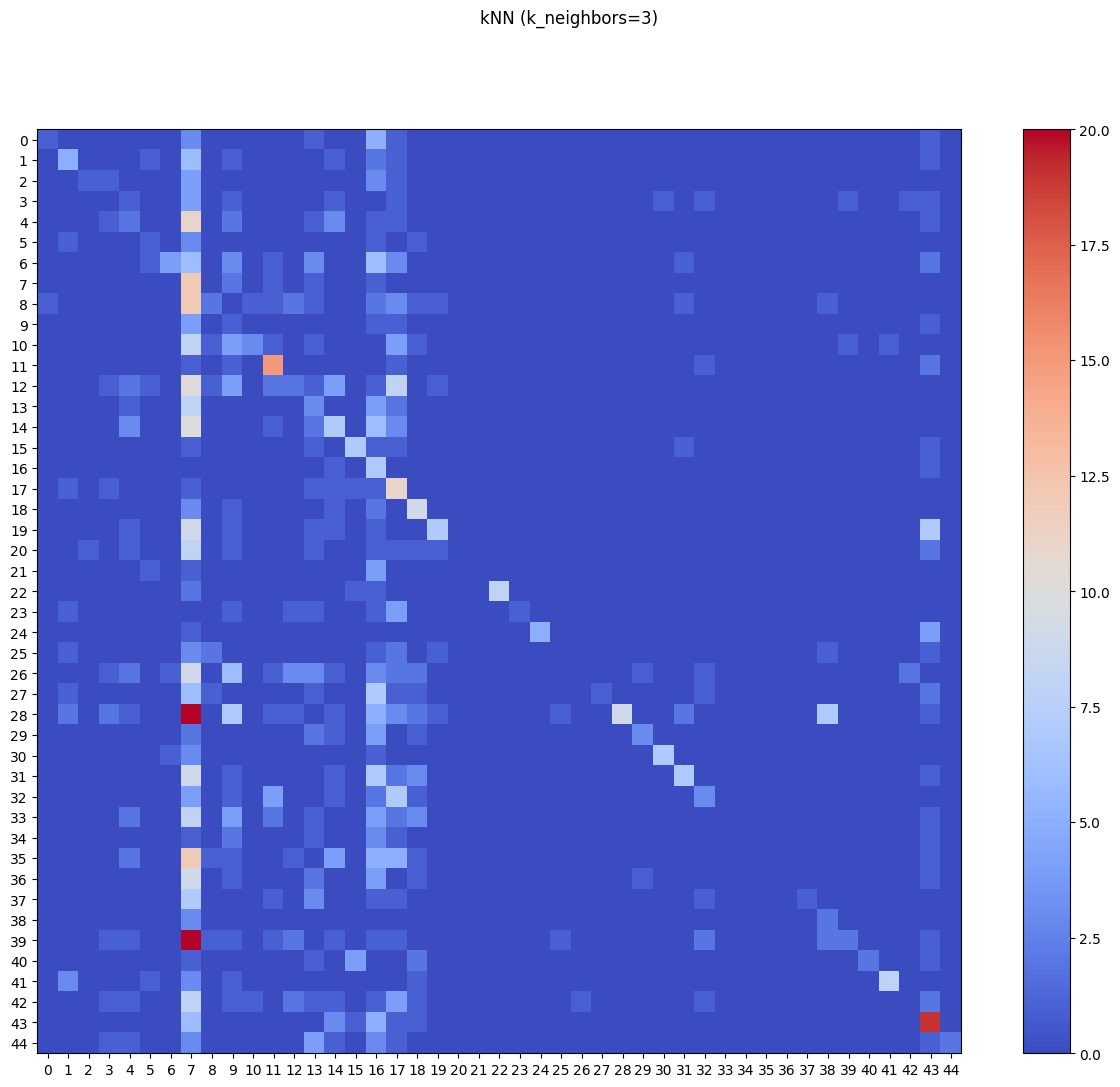

In [14]:
conf_mtx = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred_knn3.tolist()),
    display_labels=[False]
)

fig, ax = plt.subplots(figsize=(16,12))
fig.suptitle("kNN (k_neighbors=3)")
conf_mtx.plot(ax=ax, cmap='coolwarm', include_values=False)

![Scikit-Image Introduction](./assets/Scikit_Image_Model_Deployment_01.webp)

ValueError: The number of FixedLocator locations (45), usually from a call to set_ticks, does not match the number of labels (1).

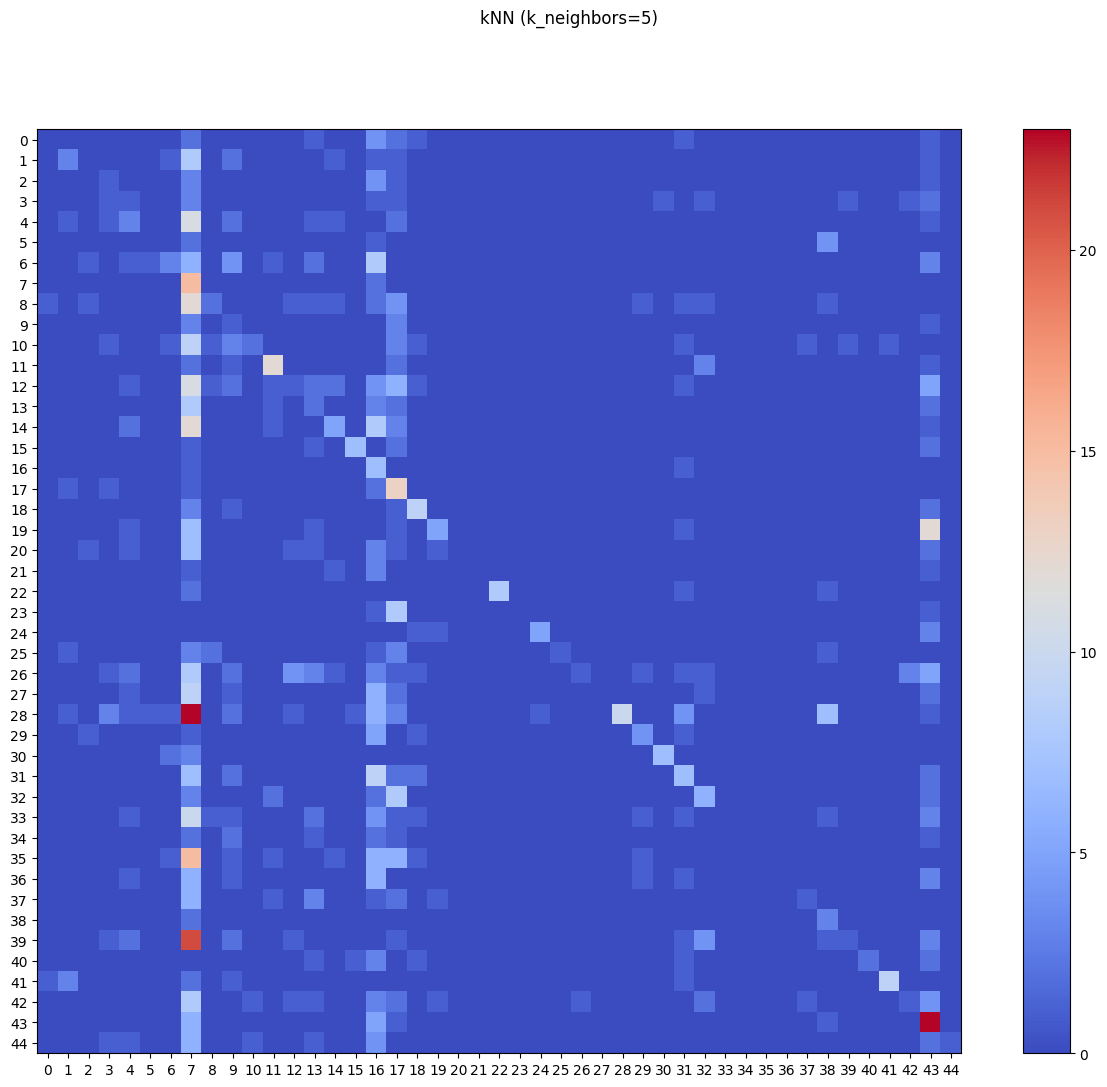

In [15]:
conf_mtx = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred_knn5.tolist()),
    display_labels=[False]
)

fig, ax = plt.subplots(figsize=(16,12))
fig.suptitle("kNN (k_neighbors=5)")
conf_mtx.plot(ax=ax, cmap='coolwarm', include_values=False)

![Scikit-Image Introduction](./assets/Scikit_Image_Model_Deployment_02.webp)

In [16]:
eval_report = classification_report(y_test, y_pred_knn5, output_dict=True)
eval_df = pd.DataFrame(eval_report)

pd.options.display.max_rows = 50

eval_df.transpose()

/home/xiaodie/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xiaodie/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xiaodie/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
Adenium,0.000000,0.000000,0.000000,12.000000
Alpinia_Purpurata,0.300000,0.166667,0.214286,18.000000
Alstroemeria_Aurantiaca,0.000000,0.000000,0.000000,10.000000
Anthurium_Andraeanum,0.090909,0.076923,0.083333,13.000000
Antirrhinum,0.157895,0.130435,0.142857,23.000000
Billbergia_Pyramidalis,0.000000,0.000000,0.000000,7.000000
Cattleya_Mossiae,0.333333,0.100000,0.153846,30.000000
Cirsium_Altissimum,0.055351,0.882353,0.104167,17.000000
Coccinia_Grandis,0.285714,0.068966,0.111111,29.000000
Crocus,0.032258,0.125000,0.051282,8.000000


|  | precision | recall | f1-score | support |
| -- | -- | -- | -- | -- |
| Adenium | 0.000000 | 0.000000 | 0.000000 | 12.000000 |
| Alpinia_Purpurata | 0.300000 | 0.166667 | 0.214286 | 18.000000 |
| Alstroemeria_Aurantiaca | 0.000000 | 0.000000 | 0.000000 | 10.000000 |
| Anthurium_Andraeanum | 0.090909 | 0.076923 | 0.083333 | 13.000000 |
| Antirrhinum | 0.157895 | 0.130435 | 0.142857 | 23.000000 |
| Billbergia_Pyramidalis | 0.000000 | 0.000000 | 0.000000 | 7.000000 |
| Cattleya_Mossiae | 0.333333 | 0.100000 | 0.153846 | 30.000000 |
| Cirsium_Altissimum | 0.055351 | 0.882353 | 0.104167 | 17.000000 |
| Coccinia_Grandis | 0.285714 | 0.068966 | 0.111111 | 29.000000 |
| Crocus | 0.032258 | 0.125000 | 0.051282 | 8.000000 |
| Cyclamen | 0.500000 | 0.080000 | 0.137931 | 25.000000 |
| Dahlia_Bishop_of_Llandaff | 0.600000 | 0.571429 | 0.585366 | 21.000000 |
| Datura_Metel | 0.100000 | 0.026316 | 0.041667 | 38.000000 |
| Dianthus_Barbatus | 0.083333 | 0.111111 | 0.095238 | 18.000000 |
| Digitalis | 0.384615 | 0.156250 | 0.222222 | 32.000000 |
| Echinacea_Purpurea | 0.777778 | 0.538462 | 0.636364 | 13.000000 |
| Echinops_Bannaticus | 0.058333 | 0.777778 | 0.108527 | 9.000000 |
| Fritillaria_Meleagris | 0.146067 | 0.722222 | 0.242991 | 18.000000 |
| Gazania_Rigens | 0.450000 | 0.562500 | 0.500000 | 16.000000 |
| Gerbera_Jamesonii | 0.555556 | 0.178571 | 0.270270 | 28.000000 |
| Gladiolus | 0.000000 | 0.000000 | 0.000000 | 18.000000 |
| Guzmania_Lingulata | 0.000000 | 0.000000 | 0.000000 | 6.000000 |
| Helianthus_Annuus | 1.000000 | 0.666667 | 0.800000 | 12.000000 |
| Iris_Pseudacorus | 0.000000 | 0.000000 | 0.000000 | 10.000000 |
| Leucanthemum | 0.833333 | 0.500000 | 0.625000 | 10.000000 |
| Narcissus_Pseudonarcissus | 1.000000 | 0.083333 | 0.153846 | 12.000000 |
| Nasturtium | 0.500000 | 0.026316 | 0.050000 | 38.000000 |
| Nerine_Sarniensis | 0.000000 | 0.000000 | 0.000000 | 22.000000 |
| Nymphaea_Tetragona | 1.000000 | 0.151515 | 0.263158 | 66.000000 |
| Oenothera_Suffrutescens | 0.444444 | 0.307692 | 0.363636 | 13.000000 |
| Paphiopedilum_Micranthum | 0.875000 | 0.583333 | 0.700000 | 12.000000 |
| Passiflora | 0.280000 | 0.225806 | 0.250000 | 31.000000 |
| Pelargonium_Inquinans | 0.315789 | 0.260870 | 0.285714 | 23.000000 |
| Petunia | 0.000000 | 0.000000 | 0.000000 | 27.000000 |
| Platycodon_Grandiflorus | 0.000000 | 0.000000 | 0.000000 | 9.000000 |
| Plumeria_Alba | 0.000000 | 0.000000 | 0.000000 | 33.000000 |
| Poinsettia | 0.000000 | 0.000000 | 0.000000 | 19.000000 |
| Primula_Vulgaris | 0.333333 | 0.066667 | 0.111111 | 15.000000 |
| Protea_Cynaroides | 0.150000 | 0.600000 | 0.240000 | 5.000000 |
| Rose | 0.333333 | 0.026316 | 0.048780 | 38.000000 |
| Rudbeckia | 1.000000 | 0.181818 | 0.307692 | 11.000000 |
| Strelitzia_Reginae | 0.900000 | 0.529412 | 0.666667 | 17.000000 |
| Tropaeolum_Majus | 0.200000 | 0.038462 | 0.064516 | 26.000000 |
| Tussilago | 0.242105 | 0.638889 | 0.351145 | 36.000000 |
| Viola_Tricolor | 1.000000 | 0.058824 | 0.111111 | 17.000000 |
| accuracy | 0.198683 | 0.198683 | 0.198683 | 0.198683 |
| macro avg | 0.340411 | 0.227131 | 0.202085 | 911.000000 |
| weighted avg | 0.366206 | 0.198683 | 0.190609 | 911.000000 |

## Hyperparameter Tuning

### Training Pipeline

In [19]:
train_pipeline = Pipeline([
    ('feature_extraction', hog_transformer(
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(3, 3))
    ),
    ('normalization', StandardScaler()),
    ('model_training', KNeighborsClassifier(
        weights='uniform', p=2,
        leaf_size=30, algorithm='auto')
    )
])

In [20]:
train_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_extraction',
                 hog_transformer(orientations=9, pixels_per_cell=(8, 8))),
                ('normalization', StandardScaler()),
                ('model_training', KNeighborsClassifier())])

In [21]:
y_pred_pipe = train_pipeline.predict(X_test)

In [22]:
eval_report = classification_report(y_test, y_pred_pipe, output_dict=True)
eval_df = pd.DataFrame(eval_report)

pd.options.display.max_rows = 50
eval_df.transpose()

/home/xiaodie/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xiaodie/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xiaodie/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
Adenium,0.500000,0.083333,0.142857,12.000000
Alpinia_Purpurata,0.333333,0.166667,0.222222,18.000000
Alstroemeria_Aurantiaca,0.000000,0.000000,0.000000,10.000000
Anthurium_Andraeanum,0.142857,0.076923,0.100000,13.000000
Antirrhinum,0.052632,0.043478,0.047619,23.000000
Billbergia_Pyramidalis,0.000000,0.000000,0.000000,7.000000
Cattleya_Mossiae,0.250000,0.066667,0.105263,30.000000
Cirsium_Altissimum,0.042471,0.647059,0.079710,17.000000
Coccinia_Grandis,0.200000,0.034483,0.058824,29.000000
Crocus,0.061224,0.375000,0.105263,8.000000


|  | precision | recall | f1-score | support |
| -- | -- | -- | -- | -- |
| Adenium | 0.500000 | 0.083333 | 0.142857 | 12.000000 |
| Alpinia_Purpurata | 0.333333 | 0.166667 | 0.222222 | 18.000000 |
| Alstroemeria_Aurantiaca | 0.000000 | 0.000000 | 0.000000 | 10.000000 |
| Anthurium_Andraeanum | 0.142857 | 0.076923 | 0.100000 | 13.000000 |
| Antirrhinum | 0.052632 | 0.043478 | 0.047619 | 23.000000 |
| Billbergia_Pyramidalis | 0.000000 | 0.000000 | 0.000000 | 7.000000 |
| Cattleya_Mossiae | 0.250000 | 0.066667 | 0.105263 | 30.000000 |
| Cirsium_Altissimum | 0.042471 | 0.647059 | 0.079710 | 17.000000 |
| Coccinia_Grandis | 0.200000 | 0.034483 | 0.058824 | 29.000000 |
| Crocus | 0.061224 | 0.375000 | 0.105263 | 8.000000 |
| Cyclamen | 1.000000 | 0.040000 | 0.076923 | 25.000000 |
| Dahlia_Bishop_of_Llandaff | 0.382353 | 0.619048 | 0.472727 | 21.000000 |
| Datura_Metel | 0.666667 | 0.105263 | 0.181818 | 38.000000 |
| Dianthus_Barbatus | 0.058824 | 0.111111 | 0.076923 | 18.000000 |
| Digitalis | 0.208333 | 0.156250 | 0.178571 | 32.000000 |
| Echinacea_Purpurea | 0.636364 | 0.538462 | 0.583333 | 13.000000 |
| Echinops_Bannaticus | 0.061947 | 0.777778 | 0.114754 | 9.000000 |
| Fritillaria_Meleagris | 0.166667 | 0.611111 | 0.261905 | 18.000000 |
| Gazania_Rigens | 0.344828 | 0.625000 | 0.444444 | 16.000000 |
| Gerbera_Jamesonii | 0.625000 | 0.178571 | 0.277778 | 28.000000 |
| Gladiolus | 0.000000 | 0.000000 | 0.000000 | 18.000000 |
| Guzmania_Lingulata | 0.500000 | 0.166667 | 0.250000 | 6.000000 |
| Helianthus_Annuus | 1.000000 | 0.500000 | 0.666667 | 12.000000 |
| Iris_Pseudacorus | 1.000000 | 0.100000 | 0.181818 | 10.000000 |
| Leucanthemum | 1.000000 | 0.600000 | 0.750000 | 10.000000 |
| Narcissus_Pseudonarcissus | 1.000000 | 0.083333 | 0.153846 | 12.000000 |
| Nasturtium | 0.500000 | 0.026316 | 0.050000 | 38.000000 |
| Nerine_Sarniensis | 0.000000 | 0.000000 | 0.000000 | 22.000000 |
| Nymphaea_Tetragona | 0.909091 | 0.151515 | 0.259740 | 66.000000 |
| Oenothera_Suffrutescens | 0.428571 | 0.230769 | 0.300000 | 13.000000 |
| Paphiopedilum_Micranthum | 1.000000 | 0.500000 | 0.666667 | 12.000000 |
| Passiflora | 0.333333 | 0.322581 | 0.327869 | 31.000000 |
| Pelargonium_Inquinans | 0.222222 | 0.260870 | 0.240000 | 23.000000 |
| Petunia | 0.000000 | 0.000000 | 0.000000 | 27.000000 |
| Platycodon_Grandiflorus | 0.000000 | 0.000000 | 0.000000 | 9.000000 |
| Plumeria_Alba | 0.000000 | 0.000000 | 0.000000 | 33.000000 |
| Poinsettia | 0.000000 | 0.000000 | 0.000000 | 19.000000 |
| Primula_Vulgaris | 0.000000 | 0.000000 | 0.000000 | 15.000000 |
| Protea_Cynaroides | 0.117647 | 0.400000 | 0.181818 | 5.000000 |
| Rose | 0.714286 | 0.131579 | 0.222222 | 38.000000 |
| Rudbeckia | 1.000000 | 0.181818 | 0.307692 | 11.000000 |
| Strelitzia_Reginae | 0.900000 | 0.529412 | 0.666667 | 17.000000 |
| Tropaeolum_Majus | 0.333333 | 0.038462 | 0.068966 | 26.000000 |
| Tussilago | 0.342857 | 0.666667 | 0.452830 | 36.000000 |
| Viola_Tricolor | 1.000000 | 0.058824 | 0.111111 | 17.000000 |
| accuracy | 0.200878 | 0.200878 | 0.200878 | 0.200878 |
| macro avg | 0.400774 | 0.226778 | 0.208641 | 911.000000 |
| weighted avg | 0.418849 | 0.200878 | 0.198238 | 911.000000 |

### GridSearch

In [18]:
estimator = Pipeline([
    ('feature_extraction', hog_transformer()),
    ('normalization', StandardScaler()),
    ('model_training', KNeighborsClassifier())
])

In [19]:
param_grid = [
    {
        'feature_extraction__orientations': [10],
        'feature_extraction__pixels_per_cell': [(7, 7)],
        'feature_extraction__cells_per_block': [(3, 3)],
        'model_training__n_neighbors': [7, 9, 11, 15],
        'model_training__weights': ['uniform', 'distance'],
        'model_training__p': [1, 2],
        'model_training__leaf_size': [25, 30, 35],
        'model_training__algorithm': ['ball_tree', 'kd_tree', 'brute']
    }
]

In [20]:
model_grid = GridSearchCV(
    estimator,
    param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

In [21]:
model_grid.fit(X_train, y_train)
# Fitting 3 folds for each of 144 candidates, totalling 432 fits

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=auto, model_training__leaf_size=30, model_training__n_neighbors=7, model_training__p=1, model_training__weights=uniform; total time= 1.2min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=auto, model_training__leaf_size=30, model_training__n_neighbors=7, model_training__p=2, model_training__weights=distance; total time= 1.1min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=auto, model_training__leaf_size=30, model_training__n_neighbors=9, model_training__p=2, model_training__weights=uniform; total time= 1.1min
[CV] END feature_extraction__cells_p

[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=auto, model_training__leaf_size=30, model_training__n_neighbors=7, model_training__p=1, model_training__weights=uniform; total time= 1.2min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=auto, model_training__leaf_size=30, model_training__n_neighbors=9, model_training__p=1, model_training__weights=uniform; total time= 1.2min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=auto, model_training__leaf_size=30, model_training__n_neighbors=9, model_training__p=2, model_training__weights=uniform; total time= 1.1min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_ex

[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=auto, model_training__leaf_size=30, model_training__n_neighbors=7, model_training__p=1, model_training__weights=distance; total time= 1.2min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=auto, model_training__leaf_size=30, model_training__n_neighbors=9, model_training__p=1, model_training__weights=uniform; total time= 1.2min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=auto, model_training__leaf_size=30, model_training__n_neighbors=9, model_training__p=2, model_training__weights=distance; total time= 1.1min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_

[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=auto, model_training__leaf_size=30, model_training__n_neighbors=7, model_training__p=1, model_training__weights=distance; total time= 1.2min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=auto, model_training__leaf_size=30, model_training__n_neighbors=7, model_training__p=2, model_training__weights=distance; total time= 1.1min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=auto, model_training__leaf_size=30, model_training__n_neighbors=9, model_training__p=2, model_training__weights=uniform; total time= 1.2min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_

[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=kd_tree, model_training__leaf_size=25, model_training__n_neighbors=11, model_training__p=1, model_training__weights=uniform; total time= 1.2min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=kd_tree, model_training__leaf_size=25, model_training__n_neighbors=11, model_training__p=2, model_training__weights=uniform; total time= 1.3min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=kd_tree, model_training__leaf_size=25, model_training__n_neighbors=15, model_training__p=1, model_training__weights=distance; total time= 1.3min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=1

[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=kd_tree, model_training__leaf_size=25, model_training__n_neighbors=11, model_training__p=1, model_training__weights=distance; total time= 1.3min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=kd_tree, model_training__leaf_size=25, model_training__n_neighbors=11, model_training__p=2, model_training__weights=distance; total time= 1.3min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=kd_tree, model_training__leaf_size=25, model_training__n_neighbors=15, model_training__p=2, model_training__weights=uniform; total time= 1.4min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=

[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=kd_tree, model_training__leaf_size=25, model_training__n_neighbors=11, model_training__p=2, model_training__weights=distance; total time= 1.3min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=kd_tree, model_training__leaf_size=25, model_training__n_neighbors=15, model_training__p=2, model_training__weights=uniform; total time= 1.3min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=kd_tree, model_training__leaf_size=30, model_training__n_neighbors=7, model_training__p=1, model_training__weights=uniform; total time= 1.3min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10

[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=kd_tree, model_training__leaf_size=25, model_training__n_neighbors=15, model_training__p=1, model_training__weights=uniform; total time= 1.3min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=kd_tree, model_training__leaf_size=25, model_training__n_neighbors=15, model_training__p=2, model_training__weights=distance; total time= 1.2min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=kd_tree, model_training__leaf_size=30, model_training__n_neighbors=7, model_training__p=2, model_training__weights=uniform; total time= 1.2min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('feature_extraction',
                                        hog_transformer()),
                                       ('normalization', StandardScaler()),
                                       ('model_training',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'feature_extraction__cells_per_block': [(3, 3)],
                          'feature_extraction__orientations': [10],
                          'feature_extraction__pixels_per_cell': [(7, 7)],
                          'model_training__algorithm': ['ball_tree', 'kd_tree',
                                                        'brute'],
                          'model_training__leaf_size': [25, 30, 35],
                          'model_training__n_neighbors': [7, 9, 11, 15],
                          'model_training__p': [1, 2],
                          'model_training__weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=2)

[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=brute, model_training__leaf_size=35, model_training__n_neighbors=7, model_training__p=1, model_training__weights=uniform; total time=  56.0s
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=brute, model_training__leaf_size=35, model_training__n_neighbors=7, model_training__p=2, model_training__weights=uniform; total time=  57.8s
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=brute, model_training__leaf_size=35, model_training__n_neighbors=9, model_training__p=1, model_training__weights=distance; total time= 1.1min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, featur

[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=brute, model_training__leaf_size=35, model_training__n_neighbors=9, model_training__p=1, model_training__weights=uniform; total time= 1.0min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=brute, model_training__leaf_size=35, model_training__n_neighbors=9, model_training__p=2, model_training__weights=distance; total time= 1.0min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feature_extraction__pixels_per_cell=(7, 7), model_training__algorithm=brute, model_training__leaf_size=35, model_training__n_neighbors=11, model_training__p=1, model_training__weights=distance; total time= 1.0min
[CV] END feature_extraction__cells_per_block=(3, 3), feature_extraction__orientations=10, feat

### Best Model Evaluation

In [22]:
model_grid.best_params_
# {'feature_extraction__cells_per_block': (3, 3),
#  'feature_extraction__orientations': 10,
#  'feature_extraction__pixels_per_cell': (7, 7),
#  'model_training__algorithm': 'ball_tree',
#  'model_training__leaf_size': 25,
#  'model_training__n_neighbors': 9,
#  'model_training__p': 1,
#  'model_training__weights': 'distance'}

{'feature_extraction__cells_per_block': (3, 3),
 'feature_extraction__orientations': 10,
 'feature_extraction__pixels_per_cell': (7, 7),
 'model_training__algorithm': 'ball_tree',
 'model_training__leaf_size': 25,
 'model_training__n_neighbors': 9,
 'model_training__p': 1,
 'model_training__weights': 'distance'}

In [23]:
model_grid.best_score_
# 0.32518898176961514

0.32518898176961514

In [24]:
model_best = model_grid.best_estimator_

In [25]:
y_pred_best = model_best.predict(X_test)

In [26]:
eval_report_best = classification_report(y_test, y_pred_best, output_dict=True)
eval_best_df = pd.DataFrame(eval_report_best)
eval_best_df.transpose()

,precision,recall,f1-score,support
class_label_103,0.112903,0.411765,0.177215,17.000000
class_label_104,1.000000,0.076923,0.142857,13.000000
class_label_112,0.555556,0.416667,0.476190,12.000000
class_label_113,0.500000,0.428571,0.461538,28.000000
class_label_12,0.227273,0.384615,0.285714,13.000000
class_label_13,0.500000,0.300000,0.375000,10.000000
class_label_14,0.166667,0.043478,0.068966,23.000000
class_label_15,0.555556,0.277778,0.370370,18.000000
class_label_17,0.428571,0.250000,0.315789,12.000000
class_label_2,0.500000,0.052632,0.095238,19.000000


|  | precision | recall | f1-score | support |
| -- | -- | -- | -- | -- |
| class_label_103 | 0.112903 | 0.411765 | 0.177215 | 17.000000 |
| class_label_104 | 1.000000 | 0.076923 | 0.142857 | 13.000000 |
| class_label_112 | 0.555556 | 0.416667 | 0.476190 | 12.000000 |
| class_label_113 | 0.500000 | 0.428571 | 0.461538 | 28.000000 |
| class_label_12 | 0.227273 | 0.384615 | 0.285714 | 13.000000 |
| class_label_13 | 0.500000 | 0.300000 | 0.375000 | 10.000000 |
| class_label_14 | 0.166667 | 0.043478 | 0.068966 | 23.000000 |
| class_label_15 | 0.555556 | 0.277778 | 0.370370 | 18.000000 |
| class_label_17 | 0.428571 | 0.250000 | 0.315789 | 12.000000 |
| class_label_2 | 0.500000 | 0.052632 | 0.095238 | 19.000000 |
| class_label_24 | 0.615385 | 0.307692 | 0.410256 | 26.000000 |
| class_label_27 | 0.142857 | 0.055556 | 0.080000 | 18.000000 |
| class_label_36 | 0.857143 | 0.600000 | 0.705882 | 10.000000 |
| class_label_38 | 0.500000 | 0.142857 | 0.222222 | 7.000000 |
| class_label_39 | 0.266667 | 0.800000 | 0.400000 | 5.000000 |
| class_label_4 | 0.272727 | 0.157895 | 0.200000 | 38.000000 |
| class_label_40 | 0.333333 | 0.142857 | 0.200000 | 28.000000 |
| class_label_41 | 0.151515 | 0.555556 | 0.238095 | 9.000000 |
| class_label_42 | 0.000000 | 0.000000 | 0.000000 | 12.000000 |
| class_label_47 | 0.250000 | 0.055556 | 0.090909 | 18.000000 |
| class_label_52 | 0.741935 | 0.696970 | 0.718750 | 66.000000 |
| class_label_54 | 0.750000 | 0.600000 | 0.666667 | 30.000000 |
| class_label_56 | 0.171429 | 0.666667 | 0.272727 | 18.000000 |
| class_label_58 | 0.521739 | 0.705882 | 0.600000 | 17.000000 |
| class_label_59 | 0.555556 | 0.384615 | 0.454545 | 13.000000 |
| class_label_60 | 0.000000 | 0.000000 | 0.000000 | 9.000000 |
| class_label_62 | 0.363636 | 0.160000 | 0.222222 | 25.000000 |
| class_label_63 | 0.476190 | 0.833333 | 0.606061 | 12.000000 |
| class_label_65 | 0.000000 | 0.000000 | 0.000000 | 8.000000 |
| class_label_66 | 0.421053 | 0.500000 | 0.457143 | 16.000000 |
| class_label_67 | 0.500000 | 0.074074 | 0.129032 | 27.000000 |
| class_label_7 | 0.500000 | 0.136364 | 0.214286 | 22.000000 |
| class_label_70 | 0.750000 | 0.090909 | 0.162162 | 33.000000 |
| class_label_73 | 1.000000 | 0.166667 | 0.285714 | 6.000000 |
| class_label_74 | 0.215385 | 0.777778 | 0.337349 | 36.000000 |
| class_label_75 | 1.000000 | 0.500000 | 0.666667 | 10.000000 |
| class_label_77 | 0.351351 | 0.419355 | 0.382353 | 31.000000 |
| class_label_82 | 0.236364 | 0.565217 | 0.333333 | 23.000000 |
| class_label_83 | 0.317073 | 0.619048 | 0.419355 | 21.000000 |
| class_label_84 | 0.354839 | 0.343750 | 0.349206 | 32.000000 |
| class_label_85 | 0.550000 | 0.564103 | 0.556962 | 39.000000 |
| class_label_86 | 0.875000 | 0.411765 | 0.560000 | 17.000000 |
| class_label_95 | 0.600000 | 0.545455 | 0.571429 | 11.000000 |
| class_label_96 | 0.466667 | 0.358974 | 0.405797 | 39.000000 |
| class_label_97 | 0.000000 | 0.000000 | 0.000000 | 15.000000 |
| accuracy | 0.367325 | 0.367325 | 0.367325 | 0.367325 |
| macro avg | 0.436764 | 0.346252 | 0.326400 | 912.000000 |
| weighted avg | 0.449793 | 0.367325 | 0.350933 | 912.000000 |

ValueError: The number of FixedLocator locations (45), usually from a call to set_ticks, does not match the number of labels (1).

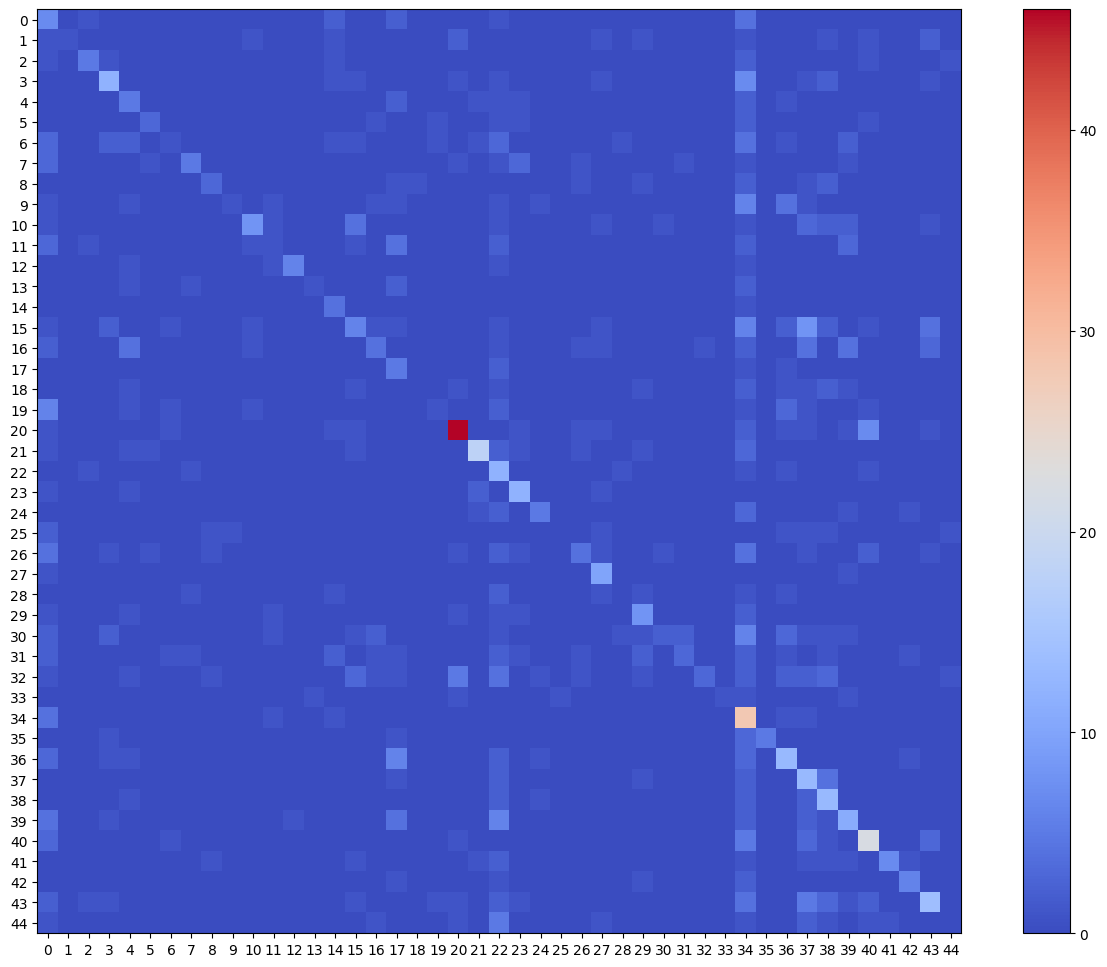

In [27]:
conf_mtx = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred_best.tolist()),
    display_labels=[False]
)

fig, ax = plt.subplots(figsize=(16,12))
conf_mtx.plot(ax=ax, cmap='coolwarm', include_values=False)

![Scikit-Image Introduction](./assets/Scikit_Image_Model_Deployment_03.webp)

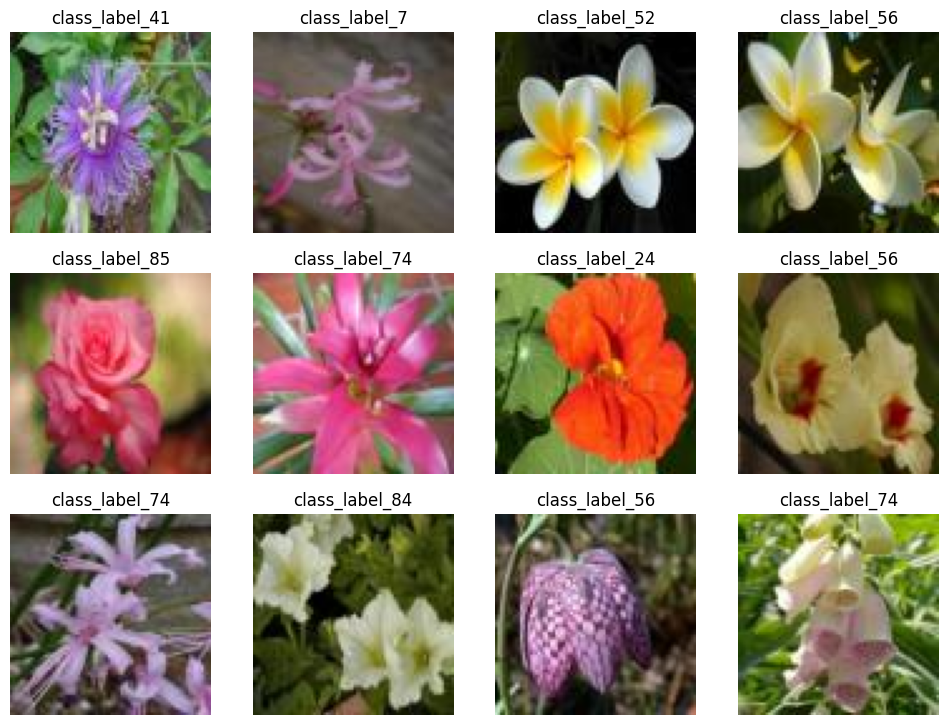

In [28]:
# plot predictions
ran_gen = np.random.default_rng()

plt.figure(figsize=(12, 12))

for i in range(12):
    ax = plt.subplot(4, 4, i+1)
    random_index = ran_gen.integers(low=0, high=403, size=1)
    plt.imshow(X_test[random_index[0]])
    plt.title(y_pred_best[random_index[0]])
    plt.axis(False)

plt.savefig('assets/Scikit_Image_Model_Deployment_04.webp', bbox_inches='tight')

![Scikit-Image Introduction](./assets/Scikit_Image_Model_Deployment_04.webp)

## Deployment Model

### Model Training

In [17]:
best_params = {'feature_extraction__cells_per_block': (3, 3),
 'feature_extraction__orientations': 10,
 'feature_extraction__pixels_per_cell': (7, 7),
 'model_training__algorithm': 'ball_tree',
 'model_training__leaf_size': 25,
 'model_training__n_neighbors': 5,
 'model_training__p': 1,
 'model_training__weights': 'distance'}

In [18]:
feature_extractor_pipe = make_pipeline(
    hog_transformer(
        orientations=10,
        pixels_per_cell=(7, 7),
        cells_per_block=(3, 3))
    )

In [19]:
# fit model to entire dataset
feature_vectors = feature_extractor_pipe.fit_transform(X)

In [20]:
normalizer = StandardScaler()

In [21]:
feature_normed = normalizer.fit_transform(feature_vectors)

In [22]:
classifier = KNeighborsClassifier(
 algorithm = 'ball_tree',
 leaf_size = 25,
 n_neighbors = 5,
 p = 1,
 weights = 'distance'
)

In [23]:
classifier.fit(feature_normed, y)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=25, p=1,
                     weights='distance')

### Model Evaluation

In [24]:
feature_vectors_test = feature_extractor_pipe.transform(X_test)
feature_normed_test = normalizer.transform(feature_vectors_test)
y_pred_deploy = classifier.predict(feature_normed_test)

In [25]:
eval_report_best = classification_report(y_test, y_pred_deploy, output_dict=True)
eval_best_df = pd.DataFrame(eval_report_best)
eval_best_df.transpose()

,precision,recall,f1-score,support
Adenium,1.0,1.0,1.0,12.0
Alpinia_Purpurata,1.0,1.0,1.0,18.0
Alstroemeria_Aurantiaca,1.0,1.0,1.0,10.0
Anthurium_Andraeanum,1.0,1.0,1.0,13.0
Antirrhinum,1.0,1.0,1.0,23.0
Billbergia_Pyramidalis,1.0,1.0,1.0,7.0
Cattleya_Mossiae,1.0,1.0,1.0,30.0
Cirsium_Altissimum,1.0,1.0,1.0,17.0
Coccinia_Grandis,1.0,1.0,1.0,29.0
Crocus,1.0,1.0,1.0,8.0


|  | precision | recall | f1-score | support |
| -- | -- | -- | -- | -- |
| Adenium | 1.0 | 1.0 | 1.0 | 12.0 |
| Alpinia_Purpurata | 1.0 | 1.0 | 1.0 | 18.0 |
| Alstroemeria_Aurantiaca | 1.0 | 1.0 | 1.0 | 10.0 |
| Anthurium_Andraeanum | 1.0 | 1.0 | 1.0 | 13.0 |
| Antirrhinum | 1.0 | 1.0 | 1.0 | 23.0 |
| Billbergia_Pyramidalis | 1.0 | 1.0 | 1.0 | 7.0 |
| Cattleya_Mossiae | 1.0 | 1.0 | 1.0 | 30.0 |
| Cirsium_Altissimum | 1.0 | 1.0 | 1.0 | 17.0 |
| Coccinia_Grandis | 1.0 | 1.0 | 1.0 | 29.0 |
| Crocus | 1.0 | 1.0 | 1.0 | 8.0 |
| Cyclamen | 1.0 | 1.0 | 1.0 | 25.0 |
| Dahlia_Bishop_of_Llandaff | 1.0 | 1.0 | 1.0 | 21.0 |
| Datura_Metel | 1.0 | 1.0 | 1.0 | 38.0 |
| Dianthus_Barbatus | 1.0 | 1.0 | 1.0 | 18.0 |
| Digitalis | 1.0 | 1.0 | 1.0 | 32.0 |
| Echinacea_Purpurea | 1.0 | 1.0 | 1.0 | 13.0 |
| Echinops_Bannaticus | 1.0 | 1.0 | 1.0 | 9.0 |
| Fritillaria_Meleagris | 1.0 | 1.0 | 1.0 | 18.0 |
| Gazania_Rigens | 1.0 | 1.0 | 1.0 | 16.0 |
| Gerbera_Jamesonii | 1.0 | 1.0 | 1.0 | 28.0 |
| Gladiolus | 1.0 | 1.0 | 1.0 | 18.0 |
| Guzmania_Lingulata | 1.0 | 1.0 | 1.0 | 6.0 |
| Helianthus_Annuus | 1.0 | 1.0 | 1.0 | 12.0 |
| Iris_Pseudacorus | 1.0 | 1.0 | 1.0 | 10.0 |
| Leucanthemum | 1.0 | 1.0 | 1.0 | 10.0 |
| Narcissus_Pseudonarcissus | 1.0 | 1.0 | 1.0 | 12.0 |
| Nasturtium | 1.0 | 1.0 | 1.0 | 38.0 |
| Nerine_Sarniensis | 1.0 | 1.0 | 1.0 | 22.0 |
| Nymphaea_Tetragona | 1.0 | 1.0 | 1.0 | 66.0 |
| Oenothera_Suffrutescens | 1.0 | 1.0 | 1.0 | 13.0 |
| Paphiopedilum_Micranthum | 1.0 | 1.0 | 1.0 | 12.0 |
| Passiflora | 1.0 | 1.0 | 1.0 | 31.0 |
| Pelargonium_Inquinans | 1.0 | 1.0 | 1.0 | 23.0 |
| Petunia | 1.0 | 1.0 | 1.0 | 27.0 |
| Platycodon_Grandiflorus | 1.0 | 1.0 | 1.0 | 9.0 |
| Plumeria_Alba | 1.0 | 1.0 | 1.0 | 33.0 |
| Poinsettia | 1.0 | 1.0 | 1.0 | 19.0 |
| Primula_Vulgaris | 1.0 | 1.0 | 1.0 | 15.0 |
| Protea_Cynaroides | 1.0 | 1.0 | 1.0 | 5.0 |
| Rose | 1.0 | 1.0 | 1.0 | 38.0 |
| Rudbeckia | 1.0 | 1.0 | 1.0 | 11.0 |
| Strelitzia_Reginae | 1.0 | 1.0 | 1.0 | 17.0 |
| Tropaeolum_Majus | 1.0 | 1.0 | 1.0 | 26.0 |
| Tussilago | 1.0 | 1.0 | 1.0 | 36.0 |
| Viola_Tricolor | 1.0 | 1.0 | 1.0 | 17.0 |
| accuracy | 1.0 | 1.0 | 1.0 | 1.0 |
| macro avg | 1.0 | 1.0 | 1.0 | 911.0 |
| weighted avg | 1.0 | 1.0 | 1.0 | 911.0 |

### Model Export

In [26]:
# save the model
output = open('../STEP3_Webfrontend_Deployment/static/models/knn_model_deployment.pkl', 'wb')
pickle.dump(classifier, output)

In [27]:
# save fitted normalizer
output = open('../STEP3_Webfrontend_Deployment/static/models/knn_model_deployment_scaler.pkl', 'wb')
pickle.dump(normalizer, output)